In [3]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# from   getdist       import plots, MCSamples 
from   astropy.table import Table

In [4]:
sys.path.append(os.environ['HOME'] + '/DESI/')

In [5]:
import pubplot

from   schechter     import schechter, named_schechter
from   findfile      import findfile

In [6]:
version = 'latest'
survey = 'gama'
dryrun = False

##  VMAX

In [7]:
fpath = findfile(ftype='vmax', dryrun=dryrun, version=version, survey=survey)
gama_vmax = Table.read(fpath)
gama_vmax

ZGAMA,ZMIN,ZMAX,MCOLOR_0P0,DDPMALL_0P0_VISZ,FIELD,VMAX,VZ
,,,mag,,,,
float32,float64,float64,float64,float64,bytes3,float64,float64
0.04729,0.03903000056743622,0.08183233858717384,-17.193592388335937,-16.046459101933998,G12,228724.08805456513,22054.83350758585
0.20122,0.03903000056743622,0.26298999786376953,-20.67650453873228,-19.38962417724164,G12,7594841.612883208,3525457.963994145
0.05365,0.03903000056743622,0.10314031824566675,-17.71167427485992,-16.33357211774324,G9,480101.9882130583,45105.72829050974
0.14181,0.03903000056743622,0.26298999786376953,-20.349613246844623,-18.572635258915074,G12,7594841.612883208,1262754.3316560949
0.16915,0.03903000056743622,0.26298999786376953,-21.41420814760261,-18.98352343165484,G15,7594841.612883208,2125890.0392551883
0.13248,0.03903000056743622,0.15786886419359342,-18.908718335697667,-18.414279698458568,G15,1735339.9721856099,1030343.7876606227
0.17376,0.03903000056743622,0.26298999786376953,-20.467342813232758,-19.045717870718047,G15,7594841.612883208,2300132.47671367
0.05675,0.03903000056743622,0.08930385940107541,-17.388129265913232,-16.461667748579703,G15,304358.2332936672,58482.73281318341


##  LUMFN

In [9]:
fpath = findfile(ftype='lumfn', dryrun=dryrun, version=version, survey=survey)
gama_lf = Table.read(fpath)

#gama_lf['S2N_N']     = gama_lf['PHI_N'] / gama_lf['PHI_N_ERROR']
#gama_lf['S2N_IVMAX'] = gama_lf['PHI_IVMAX'] / gama_lf['PHI_IVMAX_ERROR']
gama_lf

MEDIAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64
-25.4,0.0,0.0,0.0,0.0,0.0,--
-25.200000000000003,0.0,0.0,0.0,0.0,0.0,--
-25.0,0.0,0.0,0.0,0.0,0.0,--
-24.800000000000004,0.0,0.0,0.0,0.0,0.0,--
-24.6,0.0,0.0,0.0,0.0,0.0,--
-24.400000000000006,0.0,0.0,0.0,0.0,0.0,--
-24.200000000000003,0.0,0.0,0.0,0.0,0.0,--
-24.000000000000007,0.0,0.0,0.0,0.0,0.0,--
-23.800000000000004,0.0,0.0,0.0,0.0,0.0,--


/tmp/ipykernel_195847/68074749.py:6: RuntimeWarning: divide by zero encountered in log10
  pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), gama_lf['PHI_N_ERROR'] / gama_lf['PHI_N'] / np.log(10.), label='RAW', alpha=0.4, lw=2)
/tmp/ipykernel_195847/68074749.py:6: RuntimeWarning: invalid value encountered in true_divide
  pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), gama_lf['PHI_N_ERROR'] / gama_lf['PHI_N'] / np.log(10.), label='RAW', alpha=0.4, lw=2)
/tmp/ipykernel_195847/68074749.py:7: RuntimeWarning: divide by zero encountered in log10
  pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), gama_lf['PHI_IVMAX_ERROR'] / gama_lf['PHI_IVMAX'] / np.log(10.), label='IVMAX', lw=2)
/tmp/ipykernel_195847/68074749.py:7: RuntimeWarning: invalid value encountered in true_divide
  pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), gama_lf['PHI_IVMAX_ERROR'] / gama_lf['PHI_IVMAX'] / np.log(10.), label='IVMAX', lw=2)


Text(0.5, 1.0, 'gama')

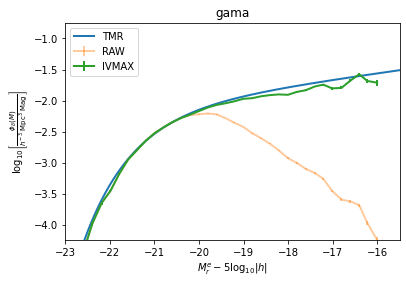

In [10]:
Ms = np.arange(-23., -15., 0.01)
sc = named_schechter(Ms, named_type='TMR')

pl.plot(Ms, np.log10(sc), label='TMR', lw=2)

pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), gama_lf['PHI_N_ERROR'] / gama_lf['PHI_N'] / np.log(10.), label='RAW', alpha=0.4, lw=2)
pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), gama_lf['PHI_IVMAX_ERROR'] / gama_lf['PHI_IVMAX'] / np.log(10.), label='IVMAX', lw=2)

pl.xlabel(r'$M_r^e - 5 \log_{10}|h|$')
pl.ylabel(r'$\log_{10} \left[ \frac{\phi_\delta(M)}{h^{-3} \ {\rm Mpc}^{3} \ {\rm Mag}^{}} \right] $')

pl.ylim(-4.25, -.75)
pl.xlim(-23., -15.5)

pl.legend(frameon=True, loc=2)
pl.title(survey)

##  Cobaya

In [19]:
#root = '/cosma/home/durham/{}/data/GAMA4/cobaya/'.format(os.environ['USER'])

In [20]:
#dat = Table.read(root + 'schechter_chain.1.txt', format='ascii')        

In [21]:
#samples = np.c_[dat['log10phistar'], dat['Mstar'], dat['alpha']]

In [22]:
#samples = MCSamples(samples=samples, names=['log10phistar', 'Mstar', 'alpha'], labels=['log10phistar', 'Mstar', 'alpha'])

In [23]:
tmr_ref = {'log10phistar': -2.01, 'Mstar': -20.89, 'alpha': -1.25}

In [24]:
#g = plots.get_subplot_plotter()

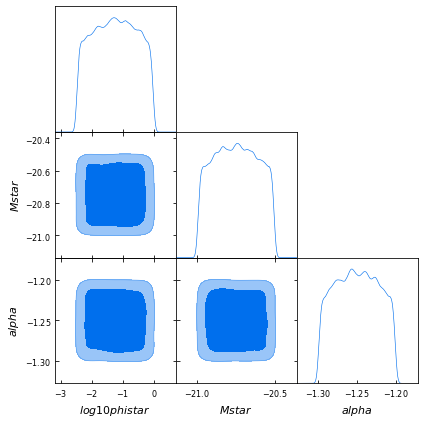

In [13]:
#g.triangle_plot([samples], filled=True)        

# Done.